In [ ]:
#Entire code was improvised multiple time by Sheekar Banerjee through iterative hyper-parameter tuning, training and testing
#Google Colab Cloud GPU was used as a runtime environment
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='C:/Flower google dataset', untar=True)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5874818796_3efbb8769d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/7790614422_4557928ab9_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/11642632_1e7627a2cc.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/9204730092_a7f2182347.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2520369272_1dcdb5a892_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/1402130395_0b89d76029.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg')]

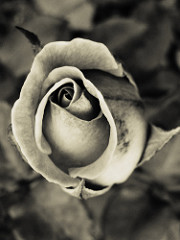

In [ ]:
PIL.Image.open(str(roses[1]))

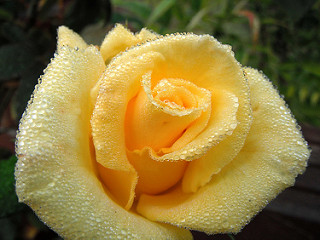

In [ ]:
PIL.Image.open(str(roses[2]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
len(X_test)

918

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 33s 40ms/step - loss: 1.3034 - accuracy: 0.4528
Epoch 2/30
86/86 [==============================] - 3s 39ms/step - loss: 0.9702 - accuracy: 0.6265
Epoch 3/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7769 - accuracy: 0.7064
Epoch 4/30
86/86 [==============================] - 3s 39ms/step - loss: 0.5751 - accuracy: 0.7969
Epoch 5/30
86/86 [==============================] - 3s 39ms/step - loss: 0.3785 - accuracy: 0.8666
Epoch 6/30
86/86 [==============================] - 3s 39ms/step - loss: 0.2183 - accuracy: 0.9270
Epoch 7/30
86/86 [==============================] - 3s 39ms/step - loss: 0.1309 - accuracy: 0.9604
Epoch 8/30
86/86 [==============================] - 3s 40ms/step - loss: 0.0903 - accuracy: 0.9746
Epoch 9/30
86/86 [==============================] - 3s 40ms/step - loss: 0.0777 - accuracy: 0.9800
Epoch 10/30
86/86 [==============================] - 3s 39ms/step - loss: 0.0508 - accuracy: 0.9866
Epoch 11

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 26ms/step - loss: 2.7321 - accuracy: 0.6264


[2.7321066856384277, 0.6263616681098938]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -7.757948  ,   7.877682  ,  -1.9932197 ,   0.02927955,
         -5.1881695 ],
       [  8.0451975 ,  -6.262391  ,  -2.5712214 ,  -7.929079  ,
         10.995398  ],
       [ -2.2114558 ,   7.7587733 ,   3.685558  , -10.895065  ,
         -5.007527  ],
       ...,
       [ -5.598026  ,   9.76239   ,  -4.8239293 ,   4.889021  ,
         -2.7906187 ],
       [ -2.8004613 ,   1.0761855 ,   7.432637  ,  -7.304139  ,
         -3.503808  ],
       [ -2.0114355 ,   4.4547143 ,  -0.21926278,  -1.8352731 ,
         -3.124611  ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential([
    
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.7),
    layers.experimental.preprocessing.RandomRotation(0.2),
  ]
)

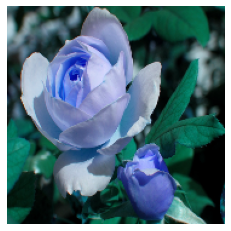

In [ ]:
plt.axis('off')
plt.imshow(X[0])

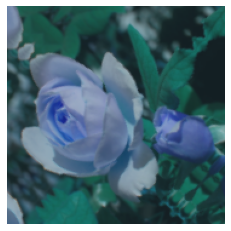

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 46ms/step - loss: 1.3445 - accuracy: 0.4204
Epoch 2/30
86/86 [==============================] - 4s 46ms/step - loss: 1.1544 - accuracy: 0.5178
Epoch 3/30
86/86 [==============================] - 4s 46ms/step - loss: 1.0679 - accuracy: 0.5592
Epoch 4/30
86/86 [==============================] - 4s 46ms/step - loss: 1.0564 - accuracy: 0.5796
Epoch 5/30
86/86 [==============================] - 4s 46ms/step - loss: 1.0547 - accuracy: 0.5745
Epoch 6/30
86/86 [==============================] - 4s 46ms/step - loss: 0.9312 - accuracy: 0.6424
Epoch 7/30
86/86 [==============================] - 4s 45ms/step - loss: 0.9424 - accuracy: 0.6308
Epoch 8/30
86/86 [==============================] - 4s 46ms/step - loss: 0.9126 - accuracy: 0.6421
Epoch 9/30
86/86 [==============================] - 4s 46ms/step - loss: 0.9006 - accuracy: 0.6577
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.8569 - accuracy: 0.6788
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.7002 - accuracy: 0.7233


[0.700190544128418, 0.7233115434646606]